In [1]:
import rioxarray
import xarray as xr
import geopandas as gpd

## Parte importante
como recortar usando rioxarray

In [2]:
def preparar_para_recorte(dataset, crs="epsg:4326", xdim="lon", ydim="lat"):
    dataset = dataset.assign_coords(lon=(((dataset.lon + 180) % 360) - 180)).sortby(xdim)
    dataset = dataset.rio.set_spatial_dims(x_dim=xdim, y_dim=ydim) 
    dataset = dataset.rio.write_crs(crs)
    return dataset

In [3]:
# shape que será usado como máscara
shp_bacia = gpd.read_file("grande.shp").set_index("Name")

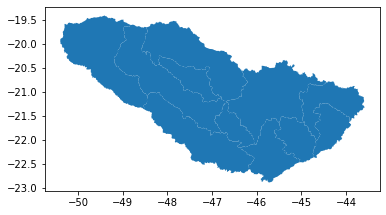

In [12]:
# a bacia do Grande é relativamente pequena para a resolução do GPCP.
# Poucos pontos dos dados devem cair dentro da bacia.
shp_bacia.plot();

In [13]:
# leitura, preparação e recorte dos dados
dados = xr.open_dataset("precip.mon.mean.nc")
dados_preparados = preparar_para_recorte(dados.precip)
dados_recortados = dados_preparados.rio.clip(shp_bacia["geometry"], "epsg:4326")

In [17]:
# cálculo da média da bacia
media_bacia = dados_recortados.mean(dim=["lat", "lon"])

### Parte desnecessária
apenas um gráfico para ver se deu tudo certo.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context="notebook", style="darkgrid")

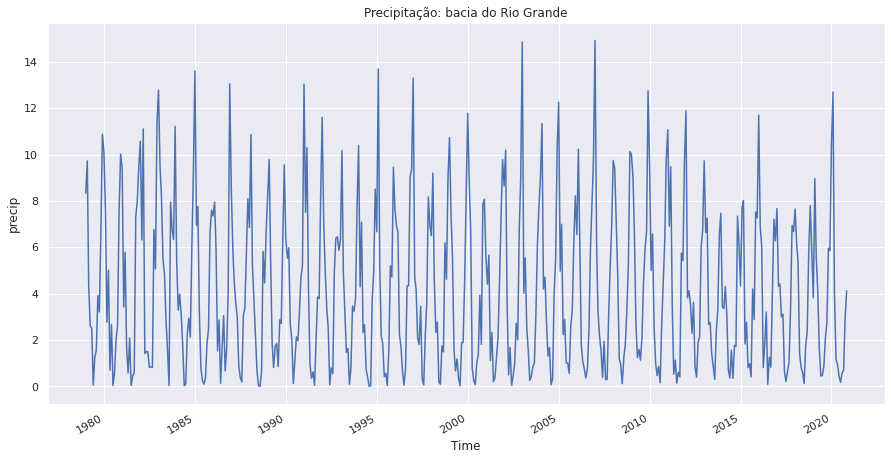

In [29]:
fig, ax = plt.subplots(figsize=(15, 7))
media_bacia.plot(ax=ax)
ax.set_title("Precipitação: bacia do Rio Grande");